In [1]:
from transformers import pipeline

import os
import cv2
import numpy as np
import glob
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from PIL import Image, ImageFilter

import segmentation_models as sm
from tensorflow.keras.metrics import MeanIoU
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import random

from transformers import DPTFeatureExtractor, DPTForDepthEstimation
import torch
import numpy as np
from PIL import Image
import requests

import pandas as pd

import pickle

/Users/daniel/opt/anaconda3/envs/daniel-uni-python-38/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2022-11-28 10:01:30.064372: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Segmentation Models: using `keras` framework.


## Step 1:  Resize images to 256x256 and remove non-interested labels (!=8)

In [4]:
#these codes are used to loop through the directory
path_images = 'rs19_val/jpgs/rs19_val/'
path_images_resized = 'rs19_val/images_resized_big/'
path_masks = 'rs19_val/uint8/rs19_val/'
path_masks_resized = 'rs19_val/masks_resized_big/'

# # read the tram list and turn it into a dict
# tram_list = pd.read_csv('tram_filenames.csv')
# tram_dict = tram_list.iloc[:,1:].to_dict()

/var/folders/q2/mpnsg4g1669g6p4sst00tyzm0000gn/T/ipykernel_21465/3924823134.py:13: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  image = Image.open(path_images+filename).resize((960,512),Image.NEAREST)
/var/folders/q2/mpnsg4g1669g6p4sst00tyzm0000gn/T/ipykernel_21465/3924823134.py:14: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  mask = Image.open(path_masks+filename[:7]+'.png').resize((960,512), Image.NEAREST)


(512, 960, 3)
(512, 960)
(8500, 512, 960, 3)
(8500, 512, 960)


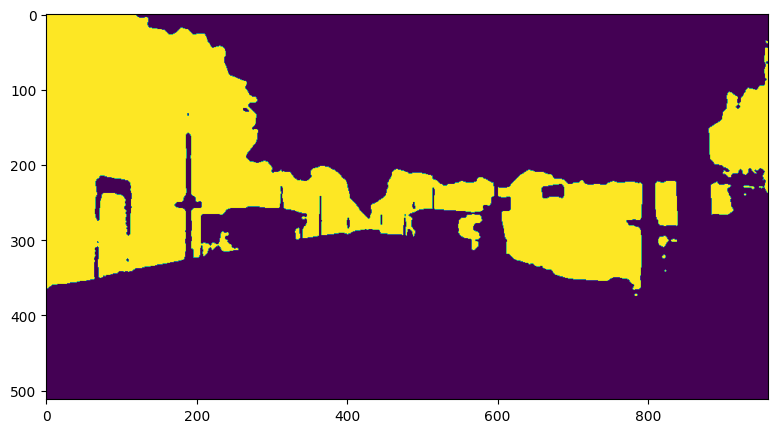

In [5]:
plt.figure(figsize = (10,5))
label_of_interest = 8 #veg

image_dataset = []
mask_dataset = []

breaker = 0

for filename in os.listdir(path_images):
    breaker +=1

    if filename.endswith('.jpg'):  
        image = Image.open(path_images+filename).resize((960,512),Image.NEAREST)
        mask = Image.open(path_masks+filename[:7]+'.png').resize((960,512), Image.NEAREST)
        mask = mask.filter(ImageFilter.MedianFilter(size= 3))
        image.save(path_images_resized+filename)
        mask.save(path_masks_resized+filename[:7]+'.png')

        image.save(path_images_resized+filename)
        mask.save(path_masks_resized+filename[:7]+'.png')
        
        image = np.array(image)
        mask = np.array(mask)
        
        # VEG-FOCUSED mask
        mask[mask!=label_of_interest]=0
        mask[mask==label_of_interest]=1


        image_dataset.append(image)
        mask_dataset.append(mask)

    if breaker==8500:
        break


# convert from list of array to array
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

pickle.dump(image_dataset, open('image_dataset_8500', "wb"))
pickle.dump(mask_dataset, open('mask_dataset_8500', "wb"))


print(image.shape)
print(mask.shape)
print(image_dataset.shape)
print(mask_dataset.shape)
plt.imshow(mask)
